In [51]:
import numpy as np

# xarray is used to read and plot the downloaded NetCDF files
import xarray as xr
import netCDF4
import sys

import matplotlib.pyplot as plt
import glob, os

import metpy, pint

from global_land_mask import globe

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as mcols


In [2]:
import numpy as np
import pandas as pd
import requests
import shutil
import time as time
from os.path import join,expanduser
user_home_dir = expanduser('~')

# xarray is used to read and plot the downloaded NetCDF files
import xarray as xr
import sys

import matplotlib.pyplot as plt

# for concurrent simultaneous downloads
from concurrent.futures import ThreadPoolExecutor
from getpass import getpass
from http.cookiejar import CookieJar
from io import StringIO
from itertools import repeat
from pathlib import Path
from platform import system
from netrc import netrc
from os.path import basename, isfile, isdir
# progress bar
from tqdm import tqdm
# library to download files
from urllib import request

import glob, os

# Predict the path of the netrc file depending on os/platform type.
_netrc = join(user_home_dir, "_netrc" if system()=="Windows" else ".netrc")

# load the ecco_v4_py package
# here is is assumed to be installed in /home/user/ECCOv4-py
# change as needed for your setup
sys.path.append(join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco

# from ecco_v4_py import *

In [5]:
DUACS_mo_dir = "/scratch/cimes/ml1994/global_topo_analysis/data/AVISO/SEALEVEL_GLO_PHY_L4_MY_008_047/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.125deg_P1M-m_202411/"
DUACS_day_dir = '/scratch/cimes/ml1994/global_topo_analysis/data/AVISO/SEALEVEL_GLO_PHY_L4_MY_008_047/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.125deg_P1D_202411/'

os.chdir(DUACS_day_dir)
DUACS_yrs = np.sort(os.listdir()) +'/'

DUACS_ex_mo = np.sort(os.listdir(DUACS_yrs[-1]+'/'))

DUACS_ex_day = np.sort(os.listdir(DUACS_yrs[-1]+'/'+DUACS_ex_mo[-1]+'/'))

DUACS_file = DUACS_ex_day[0];

DUACS_ex = xr.open_dataset(DUACS_day_dir + DUACS_yrs[-1] +'/'+DUACS_ex_mo[-1]+'/' + DUACS_file, engine="netcdf4")


In [18]:
a = DUACS_ex.ugosa.copy(deep=True)

a.data = np.zeros_like(a.data)

In [45]:
import datetime

def define_MEKE(DUACS_ex):
    os.chdir(DUACS_day_dir)

    MEKE = DUACS_ex.ugosa.copy(deep=True)
    MEKE.data = np.zeros_like(MEKE.data)

    count = 0
    
    DUACS_yrs = np.sort(os.listdir()) +'/'
    for yr in DUACS_yrs:
        print(yr)
        print(datetime.datetime.now())
        DUACS_mos = np.sort(os.listdir(yr+'/'))
        for mo in DUACS_mos:
            DUACS_days = np.sort(os.listdir(yr+'/'+mo+'/'))
            for day in DUACS_days:
                DUACS_data = xr.open_dataset(DUACS_day_dir + yr +'/' + mo +'/' + day, engine="netcdf4")

                MEKE.data += 0.5 * (DUACS_data.ugosa**2 + DUACS_data.vgosa**2)

                count+=1

    MEKE.data = MEKE.data / count

    return MEKE
                


In [46]:
MEKE = define_MEKE(DUACS_ex)

1993/
2025-02-14 16:05:40.270661
1994/
2025-02-14 16:06:53.647504
1995/
2025-02-14 16:08:08.768364
1996/
2025-02-14 16:09:23.316014
1997/
2025-02-14 16:10:40.536353
1998/
2025-02-14 16:11:56.528100
1999/
2025-02-14 16:13:11.956342
2000/
2025-02-14 16:14:26.249675
2001/
2025-02-14 16:15:44.184749
2002/
2025-02-14 16:17:02.302241
2003/
2025-02-14 16:18:20.364196
2004/
2025-02-14 16:19:38.708539
2005/
2025-02-14 16:20:56.883067
2006/
2025-02-14 16:22:15.014723
2007/
2025-02-14 16:23:33.147077
2008/
2025-02-14 16:24:51.310491
2009/
2025-02-14 16:26:09.365467
2010/
2025-02-14 16:27:27.287471
2011/
2025-02-14 16:28:45.252492
2012/
2025-02-14 16:30:03.133086
2013/
2025-02-14 16:31:21.147945
2014/
2025-02-14 16:32:39.049513
2015/
2025-02-14 16:33:57.066272
2016/
2025-02-14 16:35:15.066372
2017/
2025-02-14 16:36:33.383661
2018/
2025-02-14 16:37:51.693770
2019/
2025-02-14 16:39:09.773929
2020/
2025-02-14 16:40:28.404605
2021/
2025-02-14 16:41:46.944405
2022/
2025-02-14 16:43:05.651121
2023/
2025

In [47]:
dir_path = '/scratch/cimes/ml1994/global_topo_analysis/data/AVISO/'
MEKE.to_netcdf(path=dir_path + 'MEKE_1992_to_2023.nc')

In [57]:
MEKE

<xarray.DataArray 'ugosa' (time: 1, latitude: 1440, longitude: 2880)> Size: 33MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [0.00016272, 0.00016254, 0.00015854, ..., 0.00017534,
         0.00016543, 0.00015829],
        [0.0004056 , 0.00042056, 0.00040898, ..., 0.00040417,
         0.00040874, 0.00039886],
        [0.00338992, 0.00329213, 0.00330516, ..., 0.00342251,
         0.00335297, 0.00337907]]], shape=(1, 1440, 2880))
Coordinates:
  * time       (time) datetime64[ns] 8B 2023-12-01
  * latitude   (latitude) float32 6kB -89.94 -89.81 -89.69 ... 89.69 89.81 89.94
  * longitude  (longitude) float32 12kB -179.9 -179.8 -179.7 ... 179.8 179.9
Attributes:
    ancillary_variables:  err_ugosa
    comment:              The geostrophic velocity anomalies are referenced t...
    grid_mapping:         crs
    long_name:            Geostrophic velocity anomalies: zonal component
    standard_name:        surface_geostrophic_eastward_sea_water_velocity_ass...
    units:                m/s

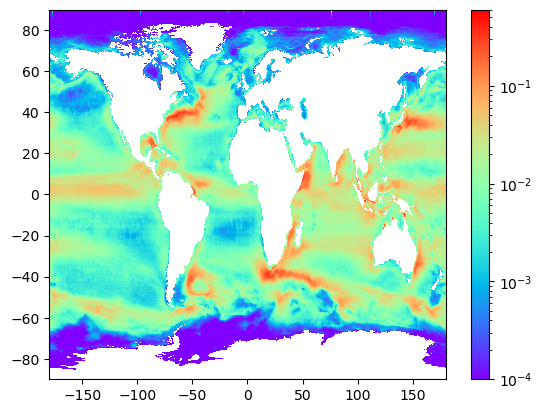

In [52]:
pc1 = plt.pcolormesh(MEKE.longitude.data, MEKE.latitude.data, MEKE.data[0,:,:], cmap=plt.get_cmap('rainbow'), norm=LogNorm(vmin=1e-4, vmax=0.6))

plt.colorbar(pc1)